In [14]:

from google.colab import files
uploaded = files.upload()

Saving Vegetable_market.csv to Vegetable_market.csv


In [ ]:
#for csv file:
import pandas as pd
df = pd.read_csv('Vegetable_market.csv') # replace 'filename.csv' with file name
print(df)

    Vegetable  Season Month  Temp Deasaster Happen in last 3month  \
0      potato  winter   jan    15                              no   
1     tomato   winter   jan    15                              no   
2        peas  winter   jan    15                              no   
3      pumkin  winter   jan    15                              no   
4    cucumber  winter   jan    15                              no   
..        ...     ...   ...   ...                             ...   
116   brinjal  winter   jan    15                             yes   
117    ginger  winter   jan    15                              no   
118    potato  summer   apr    32                              no   
119      peas  summer   apr    33                              no   
120    radish  summer   apr    32                              no   

    Vegetable condition  Price per kg  
0                 fresh            20  
1                 fresh            50  
2                 fresh            70  
3          

**clean data in process**

In [ ]:
import pandas as pd
import os # Import the os module

# Load the dataset (update the file path if needed)
file_path = " "
df = pd.read_csv('Vegetable_market.csv')  # Change vegetable_market to 'Vegetable_market.csv'


# Step 1: Rename columns for clarity
current_columns = df.columns.tolist()

# Update the desired column names to match the existing number of columns
desired_columns = ['Vegetable', 'Season', 'Month','Temp','disaster','vegetable condition' ] + current_columns[6:]  # Keep the remaining columns

# Assign the new column names
df.columns = desired_columns

# Step 2: Drop duplicate rows
df = df.drop_duplicates()

# Step 3: Check for missing values and handle them
# (Example: If missing, fill with a placeholder or drop rows with NaN values)
if df.isnull().sum().sum() > 0:
    df = df.dropna()

# Step 4: Remove unnecessary or repetitive rows
# (For example: Drop rows where column values are repeated without significance)
df = df[df['Vegetable'] != 'Vegetable']  # Remove headers within the data

# Step 5: Validate data types
# Convert the "Month" column to lowercase for consistency
df['Month'] = df['Month'].str.lower()

# Verify that "Month" values are valid
valid_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df = df[df['Month'].isin(valid_months)]

# Verify "Season" column (Optional: Define valid seasons)
valid_seasons = ['winter', 'summer', 'rainy', 'spring', 'autumn']
df = df[df['Season'].str.lower().isin(valid_seasons)]

# Step 6: Save the cleaned dataset
cleaned_file_path = "/mnt/data/cleaned_vegetable_market_data.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(cleaned_file_path), exist_ok=True)

# Display the cleaned DataFrame
df.to_csv(cleaned_file_path, index=False)  # Save to CSV
print(df) #or display(df) to view the output in Colab

    Vegetable  Season Month  Temp disaster vegetable condition  Price per kg
0      potato  winter   jan    15       no               fresh            20
1     tomato   winter   jan    15       no               fresh            50
2        peas  winter   jan    15       no               fresh            70
3      pumkin  winter   jan    15       no               fresh            25
4    cucumber  winter   jan    15       no               fresh            20
..        ...     ...   ...   ...      ...                 ...           ...
116   brinjal  winter   jan    15      yes               fresh            33
117    ginger  winter   jan    15       no               fresh            88
118    potato  summer   apr    32       no               fresh            24
119      peas  summer   apr    33       no               fresh            33
120    radish  summer   apr    32       no               fresh             9

[86 rows x 7 columns]


In [ ]:
!pip install matplotlib seaborn pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Vegetable_market.csv')

count

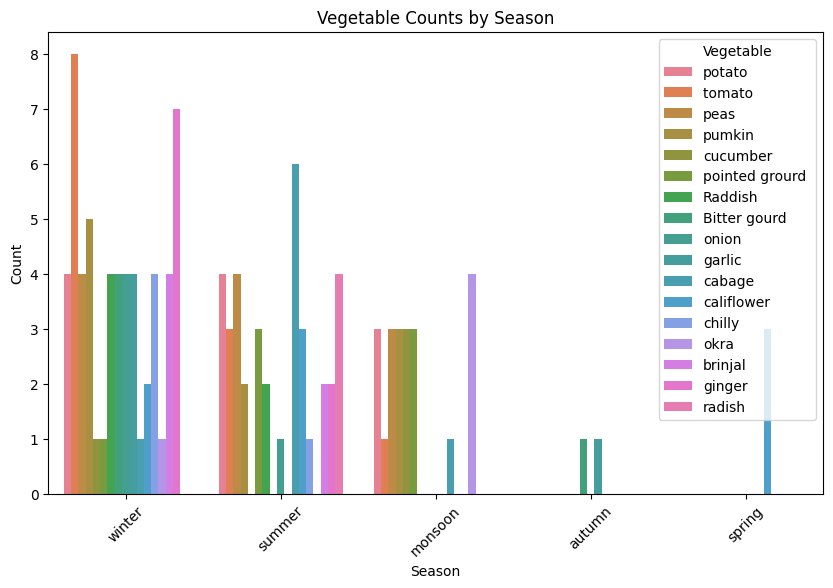

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Vegetable', data=df)
plt.title('Vegetable Counts by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Vegetable', loc='upper right')
plt.show()

scatter

Index(['Vegetable', 'Season', 'Month', 'Temp', 'disaster',
       'vegetable condition', 'Price per kg'],
      dtype='object')


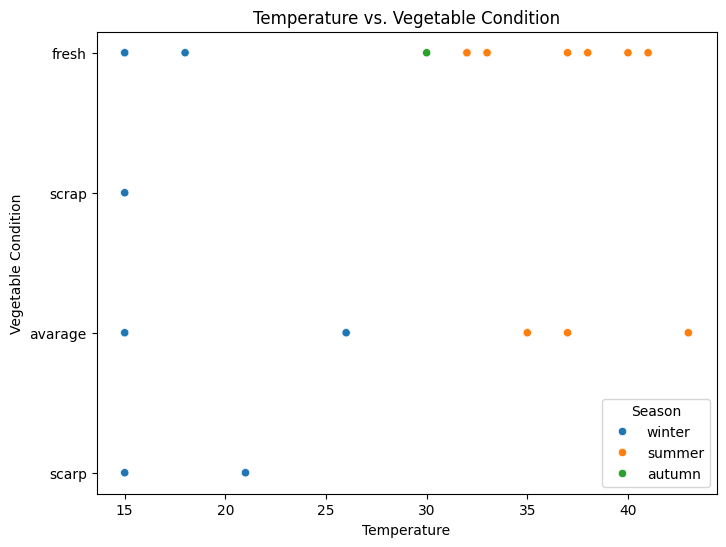

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Import os for file path operations

# Load the cleaned dataset, ensuring it's the one with the modified column names
cleaned_file_path = "/mnt/data/cleaned_vegetable_market_data.csv"
df = pd.read_csv(cleaned_file_path)

plt.figure(figsize=(8, 6))
print(df.columns)  # Print the column names of the DataFrame to verify

# Now use the correct column name 'vegetable condition'
sns.scatterplot(x='Temp', y='vegetable condition', hue='Season', data=df)
plt.title('Temperature vs. Vegetable Condition')
plt.xlabel('Temperature')
plt.ylabel('Vegetable Condition')
plt.show()

## heatmap

Index(['Vegetable', 'Season', 'Month', 'Temp',
       'Deasaster Happen in last 3month', 'Vegetable condition',
       'Price per kg'],
      dtype='object')


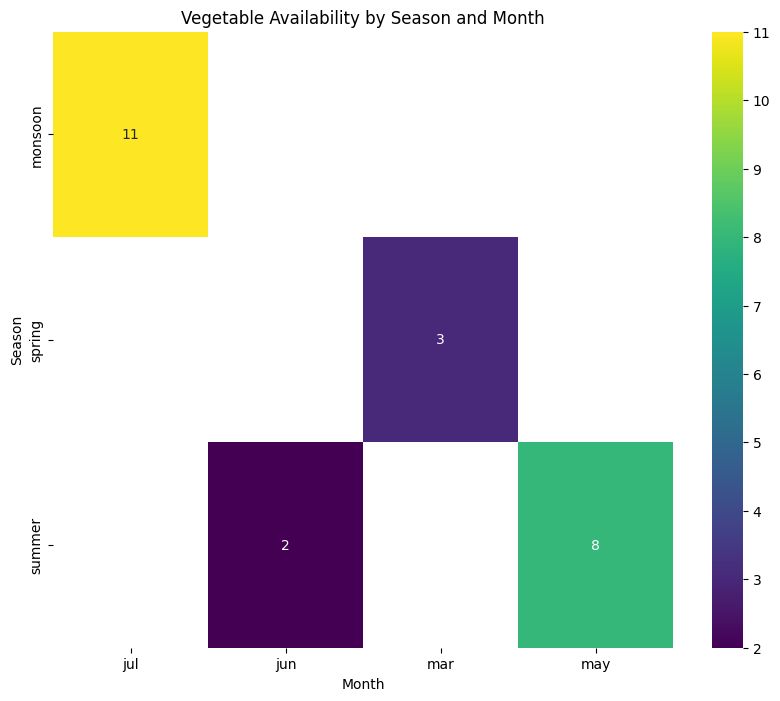

In [ ]:
# Create a pivot table for the heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Vegetable_market.csv')

# 1. Convert 'Month' to lowercase, abbreviated month names
df['Month'] = pd.to_datetime(df['Month'], format='%B', errors='coerce').dt.strftime('%b').str.lower()
df.dropna(subset=['Month'], inplace=True)

# 2. Print available columns to identify the correct name
print(df.columns)

# 3. Create a count of each vegetable by season and month
heatmap_data = df.pivot_table(index='Season', columns='Month', values='Vegetable', aggfunc='count')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f") # Format as integers
plt.title('Vegetable Availability by Season and Month')
plt.xlabel('Month')
plt.ylabel('Season')
plt.show()



> **box**



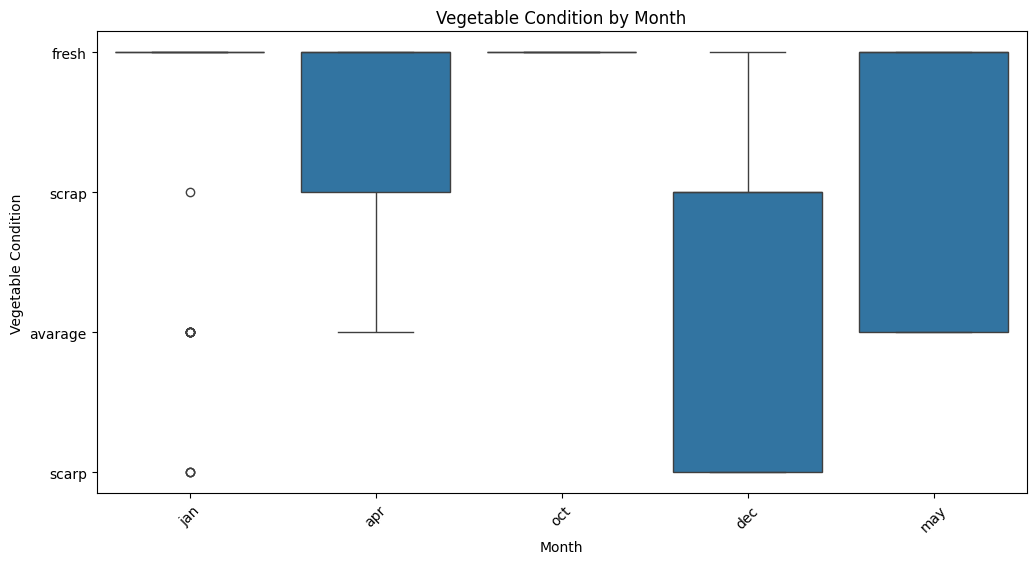

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the *cleaned* dataset to access the 'vegetable condition' column
cleaned_file_path = "/mnt/data/cleaned_vegetable_market_data.csv"
df = pd.read_csv(cleaned_file_path)

# 3. Vegetable Condition by Month
plt.figure(figsize=(12, 6))
# Check if the column exists and use it if it does
if 'vegetable condition' in df.columns:
    sns.boxplot(x='Month', y='vegetable condition', data=df)
else:
    print("Column 'vegetable condition' not found in the DataFrame. Check your data.")

plt.title('Vegetable Condition by Month')
plt.xlabel('Month')
plt.ylabel('Vegetable Condition')
plt.xticks(rotation=45)
plt.show()

# pie chart

([<matplotlib.patches.Wedge at 0x79890bc89cc0>,
 [Text(-0.49799652553814283, -0.2334511952249076, 'winter'),
  Text(0.5061904000263016, 0.2151075984739098, 'summer'),
  Text(0.020087131904551248, 0.5496330659011057, 'autumn')],
 [Text(-0.2716344684753506, -0.1273370155772223, '64.0%'),
  Text(0.27610385455980085, 0.11733141734940533, '34.9%'),
  Text(0.010956617402482499, 0.2997998541278758, '1.2%')])

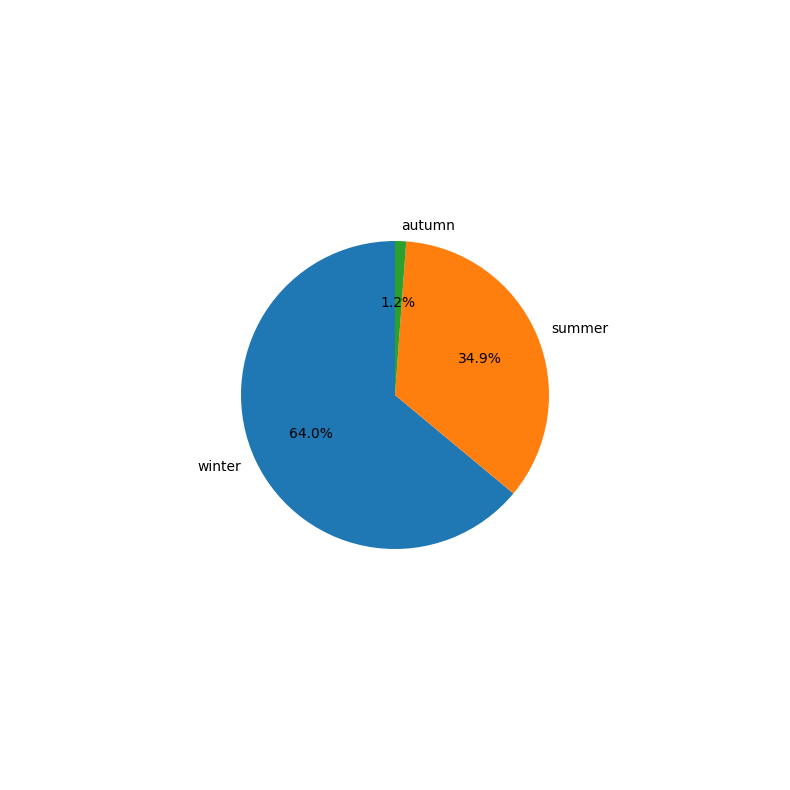

In [ ]:
plt.figure(figsize=(10, 10))  # Increase figure size
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, radius=0.5)  # Increase radius

# bar

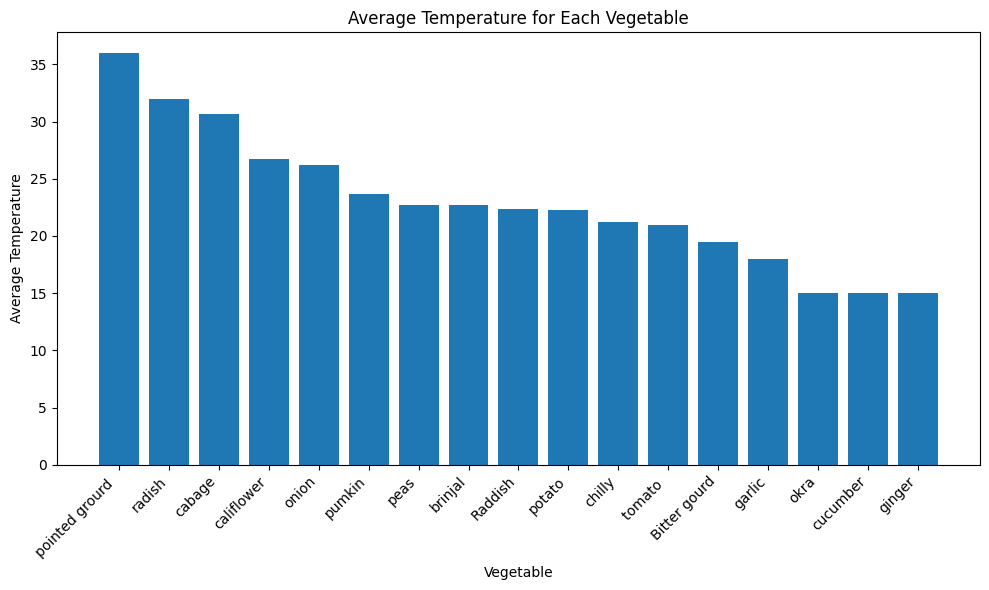

In [ ]:
vegetable_temp = df.groupby('Vegetable')['Temp'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(vegetable_temp.index, vegetable_temp.values)
plt.xlabel('Vegetable')
plt.ylabel('Average Temperature')
plt.title('Average Temperature for Each Vegetable')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# line

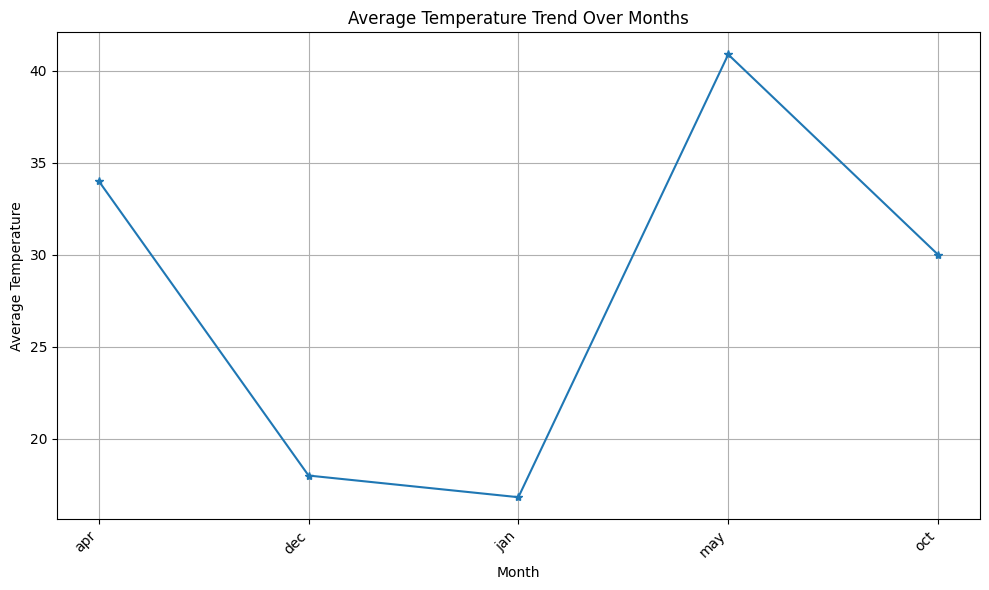

In [ ]:
monthly_temp = df.groupby('Month')['Temp'].mean()  # Calculate average temperature for each month

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(monthly_temp.index, monthly_temp.values, marker='*', linestyle='-')  # Create line chart
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Trend Over Months')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for better visualization
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

pair

Saving Vegetable_market.csv to Vegetable_market.csv


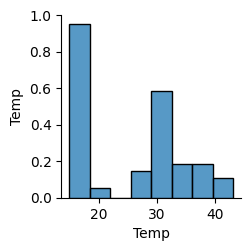

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files  # Import the files module

# Upload the file
uploaded = files.upload()

# Now read the CSV
df = pd.read_csv('Vegetable_market.csv')

# Convert 'Temp' to numeric, handling errors
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')
df.dropna(subset=['Temp'], inplace=True)

# Select the numerical columns for the pair plot
numerical_cols = ['Temp']  # Add any other relevant numerical columns

# Create the pair plot
sns.pairplot(df[numerical_cols])
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os # Import the os module

# Load the cleaned dataset
cleaned_file_path = "/mnt/data/cleaned_vegetable_market_data.csv"

# Check if the file exists and provide alternative if not
if os.path.exists(cleaned_file_path):
    df = pd.read_csv(cleaned_file_path)
else:
    # If not found, load the original dataset and process it
    df = pd.read_csv('Vegetable_market.csv')

    # ***Data Cleaning Steps (Adapt as needed)***
    # Assuming your original data has columns like 'Vegetable', 'Season', 'Month', 'Temp', etc.
    # and you want to create a 'vegetable condition' column based on some logic

    # Example: If 'Temp' is above 25, consider vegetable 'stale', otherwise 'fresh'
    df['vegetable condition'] = df['Temp'].apply(lambda x: 'stale' if x > 25 else 'fresh')

    # ... (Add other necessary data cleaning steps here) ...

# Select columns for the joint plot
x_col = 'Temp'
y_col = 'vegetable condition'

# 1. Identify non-numeric values in 'vegetable condition'
print(df[y_col].unique())  # Print unique values to identify problematic ones

# 2. Replace or remove non-numeric values (example: replacing 'fresh' with 1)
# You might need to adjust this based on the actual non-numeric values
df[y_col] = df[y_col].replace({'fresh': 1, 'stale': 0})  # Replace non-numeric values
# Alternatively, you could remove rows with non-numeric values:
# df = df[pd.to_numeric(df[y_col], errors='coerce').notnull()]

# Ensure columns are numeric
df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
df[y_col] = pd.to_numeric(df[y_col], errors='coerce')


['fresh' 'stale']


<ipython-input-22-946cac4e6756>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[y_col] = df[y_col].replace({'fresh': 1, 'stale': 0})  # Replace non-numeric values


#swarm

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


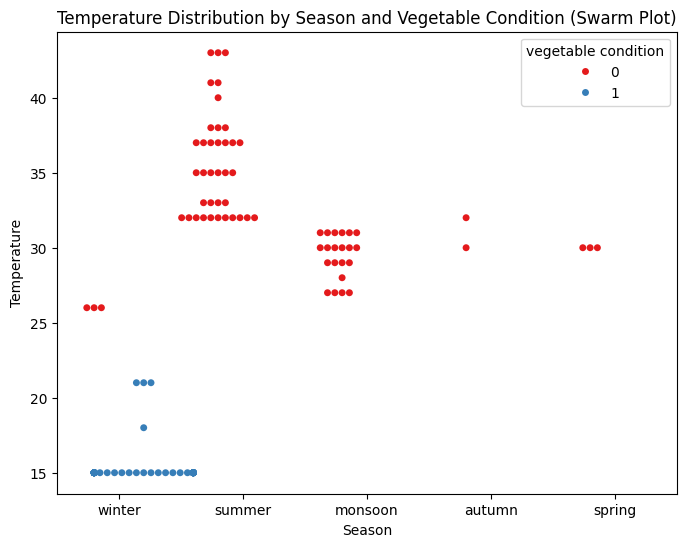

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module

# ... (Load and clean data as before) ...

# --- Swarm Plot ---

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

sns.swarmplot(x="Season", y="Temp", hue="vegetable condition", data=df,
              palette="Set1", dodge=True)

plt.title('Temperature Distribution by Season and Vegetable Condition (Swarm Plot)')
plt.xlabel('Season')
plt.ylabel('Temperature')

plt.show()

# joint plot

['fresh' 'stale']


<ipython-input-24-8979420ca1f6>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[y_col] = df[y_col].replace({'fresh': 1, 'stale': 0})  # Replace non-numeric values


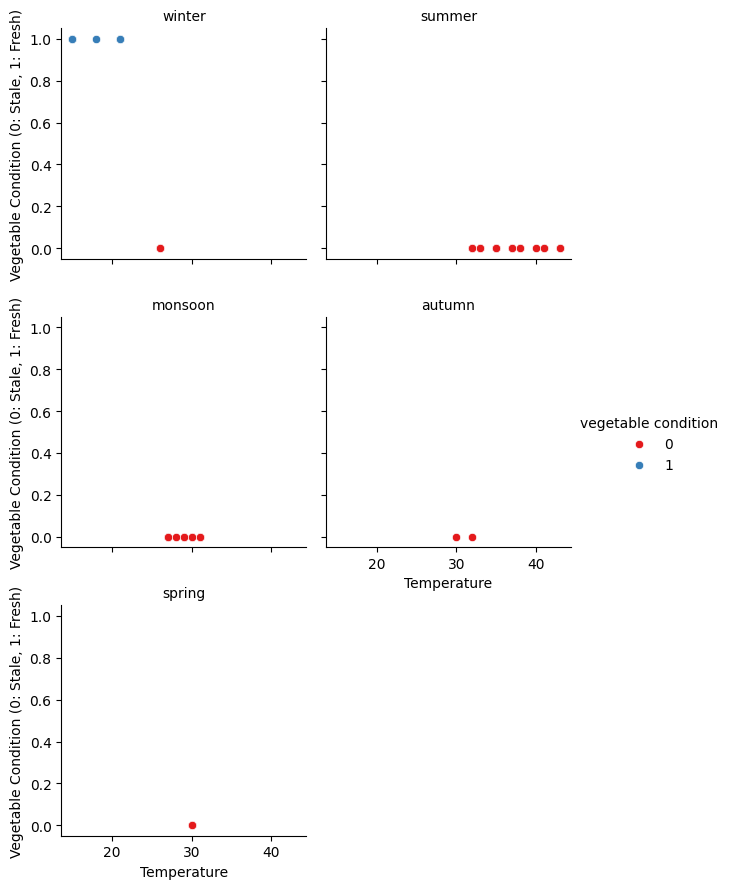

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module

# Load the cleaned dataset
cleaned_file_path = "/mnt/data/cleaned_vegetable_market_data.csv"

# Check if the file exists and provide alternative if not
if os.path.exists(cleaned_file_path):
    df = pd.read_csv(cleaned_file_path)
else:
    # If not found, load the original dataset and process it
    df = pd.read_csv('Vegetable_market.csv')

    # ***Data Cleaning Steps (Adapt as needed)***
    # Assuming your original data has columns like 'Vegetable', 'Season', 'Month', 'Temp', etc.
    # and you want to create a 'vegetable condition' column based on some logic

    # Example: If 'Temp' is above 25, consider vegetable 'stale', otherwise 'fresh'
    if 'Temp' in df.columns:  # Check if 'Temp' column exists
        df['vegetable condition'] = df['Temp'].apply(lambda x: 'stale' if x > 25 else 'fresh')
    else:
        # Handle the case where 'Temp' column is missing
        # You might want to raise an error or assign a default value
        df['vegetable condition'] = 'unknown'  # Or raise an error

    # ... (Add other necessary data cleaning steps here) ...

# Select columns for the joint plot
x_col = 'Temp'
y_col = 'vegetable condition'

# 1. Identify non-numeric values in 'vegetable condition'
print(df[y_col].unique())  # Print unique values to identify problematic ones

# 2. Replace or remove non-numeric values (example: replacing 'fresh' with 1)
# You might need to adjust this based on the actual non-numeric values
df[y_col] = df[y_col].replace({'fresh': 1, 'stale': 0})  # Replace non-numeric values
# Alternatively, you could remove rows with non-numeric values:
# df = df[pd.to_numeric(df[y_col], errors='coerce').notnull()]

# Ensure columns are numeric
df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
df[y_col] = pd.to_numeric(df[y_col], errors='coerce')


# --- FacetGrid ---

# Create the FacetGrid
g = sns.FacetGrid(df, col="Season", hue="vegetable condition",
                  palette="Set1", col_wrap=2)  # Adjust col_wrap as needed

# Add a scatter plot to each facet
g.map(sns.scatterplot, "Temp", "vegetable condition")

# Add a legend
g.add_legend()

# Customize the plot (optional)
g.set_titles("{col_name}")  # Set titles for each facet
g.set_xlabels("Temperature")
g.set_ylabels("Vegetable Condition (0: Stale, 1: Fresh)")

# Show the plot
plt.show()

**matrix**

# stirp

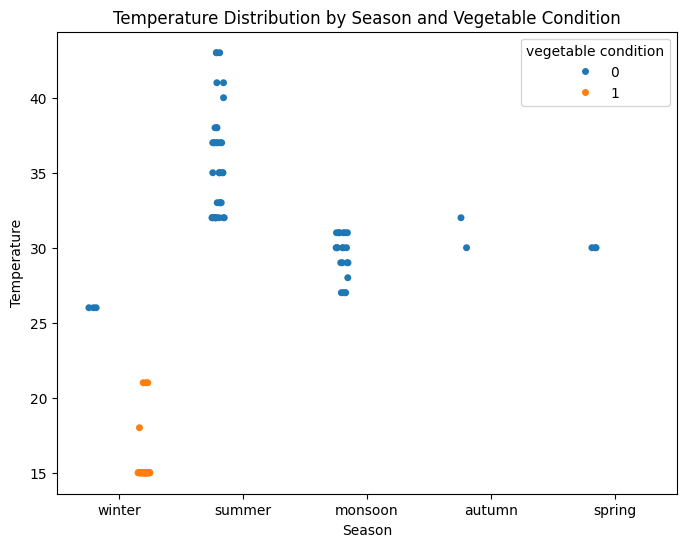

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module

# ... (Load and clean data as before) ...

# --- Strip Plot ---

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.stripplot(x="Season", y="Temp", hue="vegetable condition", data=df, jitter=True, dodge=True)
plt.title('Temperature Distribution by Season and Vegetable Condition')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.show()

# ECDF

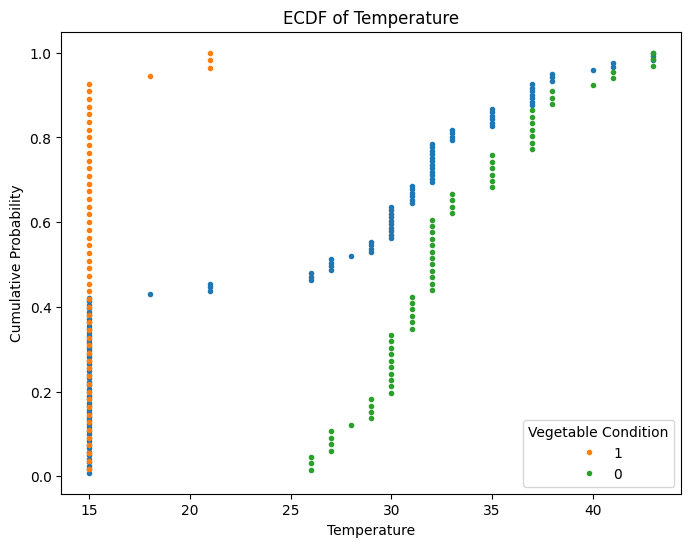

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module
import numpy as np # Import numpy for calculations

# ... (Load and clean data as before) ...

# --- ECDF Plot ---

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Calculate ECDF values
x = np.sort(df['Temp'])  # Sort the temperature data
y = np.arange(1, len(x) + 1) / len(x)  # Calculate cumulative probabilities

# Plot the ECDF
plt.plot(x, y, marker='.', linestyle='none')

# Customize the plot
plt.title('ECDF of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Cumulative Probability')

# Add ECDF for different vegetable conditions (optional)
for condition in df['vegetable condition'].unique():
    x_condition = np.sort(df[df['vegetable condition'] == condition]['Temp'])
    y_condition = np.arange(1, len(x_condition) + 1) / len(x_condition)
    plt.plot(x_condition, y_condition, marker='.', linestyle='none', label=condition)

plt.legend(title='Vegetable Condition')
plt.show()

*rug*

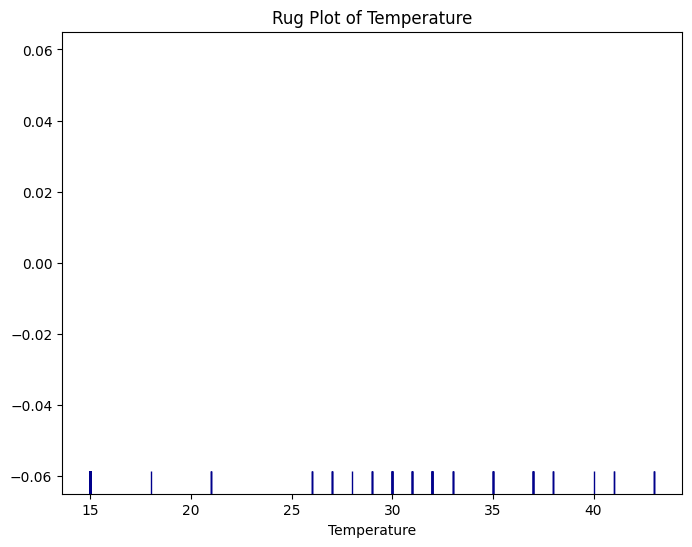

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module
import numpy as np  # Import numpy for calculations

# ... (Load and clean data as before) ...

# --- Rug Plot ---

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Create the rug plot
sns.rugplot(df['Temp'], height=0.05, color="darkblue")

# Customize the plot
plt.title('Rug Plot of Temperature')
plt.xlabel('Temperature')

plt.show()



> violin



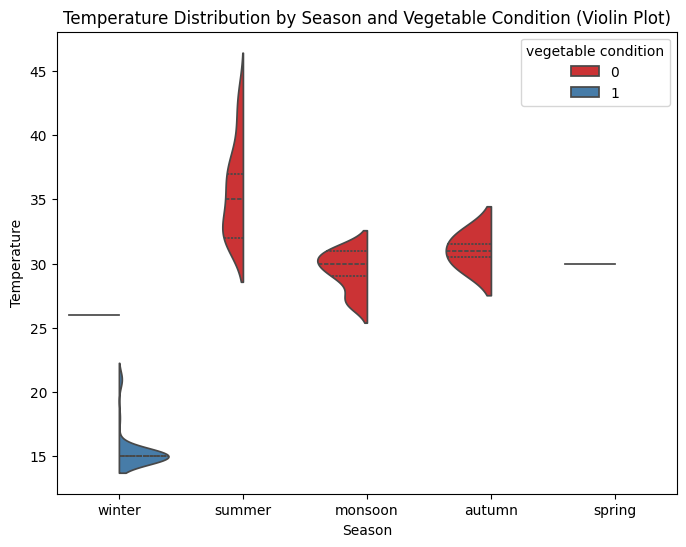

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module

# ... (Load and clean data as before) ...

# --- Violin Plot ---

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

sns.violinplot(x="Season", y="Temp", hue="vegetable condition", data=df,
               split=True, inner="quart", palette="Set1")

plt.title('Temperature Distribution by Season and Vegetable Condition (Violin Plot)')
plt.xlabel('Season')
plt.ylabel('Temperature')

plt.show()

donut

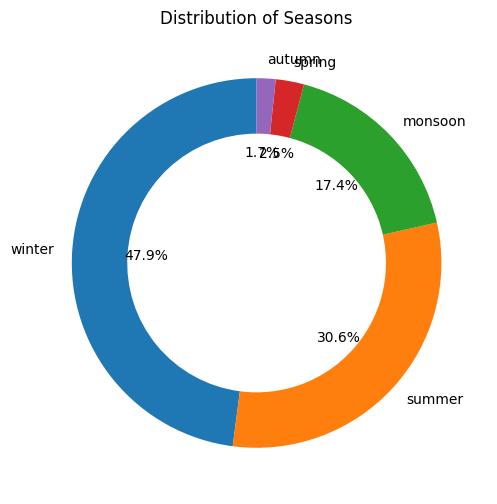

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module

# Load the cleaned dataset
cleaned_file_path = "/mnt/data/cleaned_vegetable_market_data.csv"

# Check if the file exists and provide alternative if not
if os.path.exists(cleaned_file_path):
    df = pd.read_csv(cleaned_file_path)
else:
    # If not found, load the original dataset and process it
    df = pd.read_csv('Vegetable_market.csv')

    # ***Data Cleaning Steps (Adapt as needed)***
    # Assuming your original data has columns like 'Vegetable', 'Season', 'Month', 'Temp', etc.
    # and you want to create a 'vegetable condition' column based on some logic

    # Example: If 'Temp' is above 25, consider vegetable 'stale', otherwise 'fresh'
    if 'Temp' in df.columns:  # Check if 'Temp' column exists
        df['vegetable condition'] = df['Temp'].apply(lambda x: 'stale' if x > 25 else 'fresh')
    else:
        # Handle the case where 'Temp' column is missing
        # You might want to raise an error or assign a default value
        df['vegetable condition'] = 'unknown'  # Or raise an error

    # ... (Add other necessary data cleaning steps here) ...


# --- Donut Chart ---

# 1. Calculate the counts for each category (e.g., 'Season')
category_counts = df['Season'].value_counts()

# 2. Create the donut chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))  # Create donut by setting wedgeprops

# 3. Add a title
plt.title('Distribution of Seasons')

# 4. Display the chart
plt.show()

# **conclusion**
# analysis help understand relation between temperature,season,veg condition,disaster,allowing us to pridict veg effeciency,pridicting modeling .